###IMPORTING NECESSARY LIBRARIES AND READING THE FILE

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score


from google.colab import files
uploaded = files.upload()

Saving Wholesale customers data.csv to Wholesale customers data (3).csv


In [135]:
data = pd.read_csv("/content/Wholesale customers data.csv")
data.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


In [136]:
# To see the data description.
# Provides details about central tendencies and dispersion

data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [137]:
# Provides the type of dataset feature
data.dtypes

,0
Channel,int64
Region,int64
Fresh,int64
Milk,int64
Grocery,int64
Frozen,int64
Detergents_Paper,int64
Delicassen,int64


array([[<Axes: title={'center': 'Channel'}>,
        <Axes: title={'center': 'Region'}>,
        <Axes: title={'center': 'Fresh'}>],
       [<Axes: title={'center': 'Milk'}>,
        <Axes: title={'center': 'Grocery'}>,
        <Axes: title={'center': 'Frozen'}>],
       [<Axes: title={'center': 'Detergents_Paper'}>,
        <Axes: title={'center': 'Delicassen'}>, <Axes: >]], dtype=object)

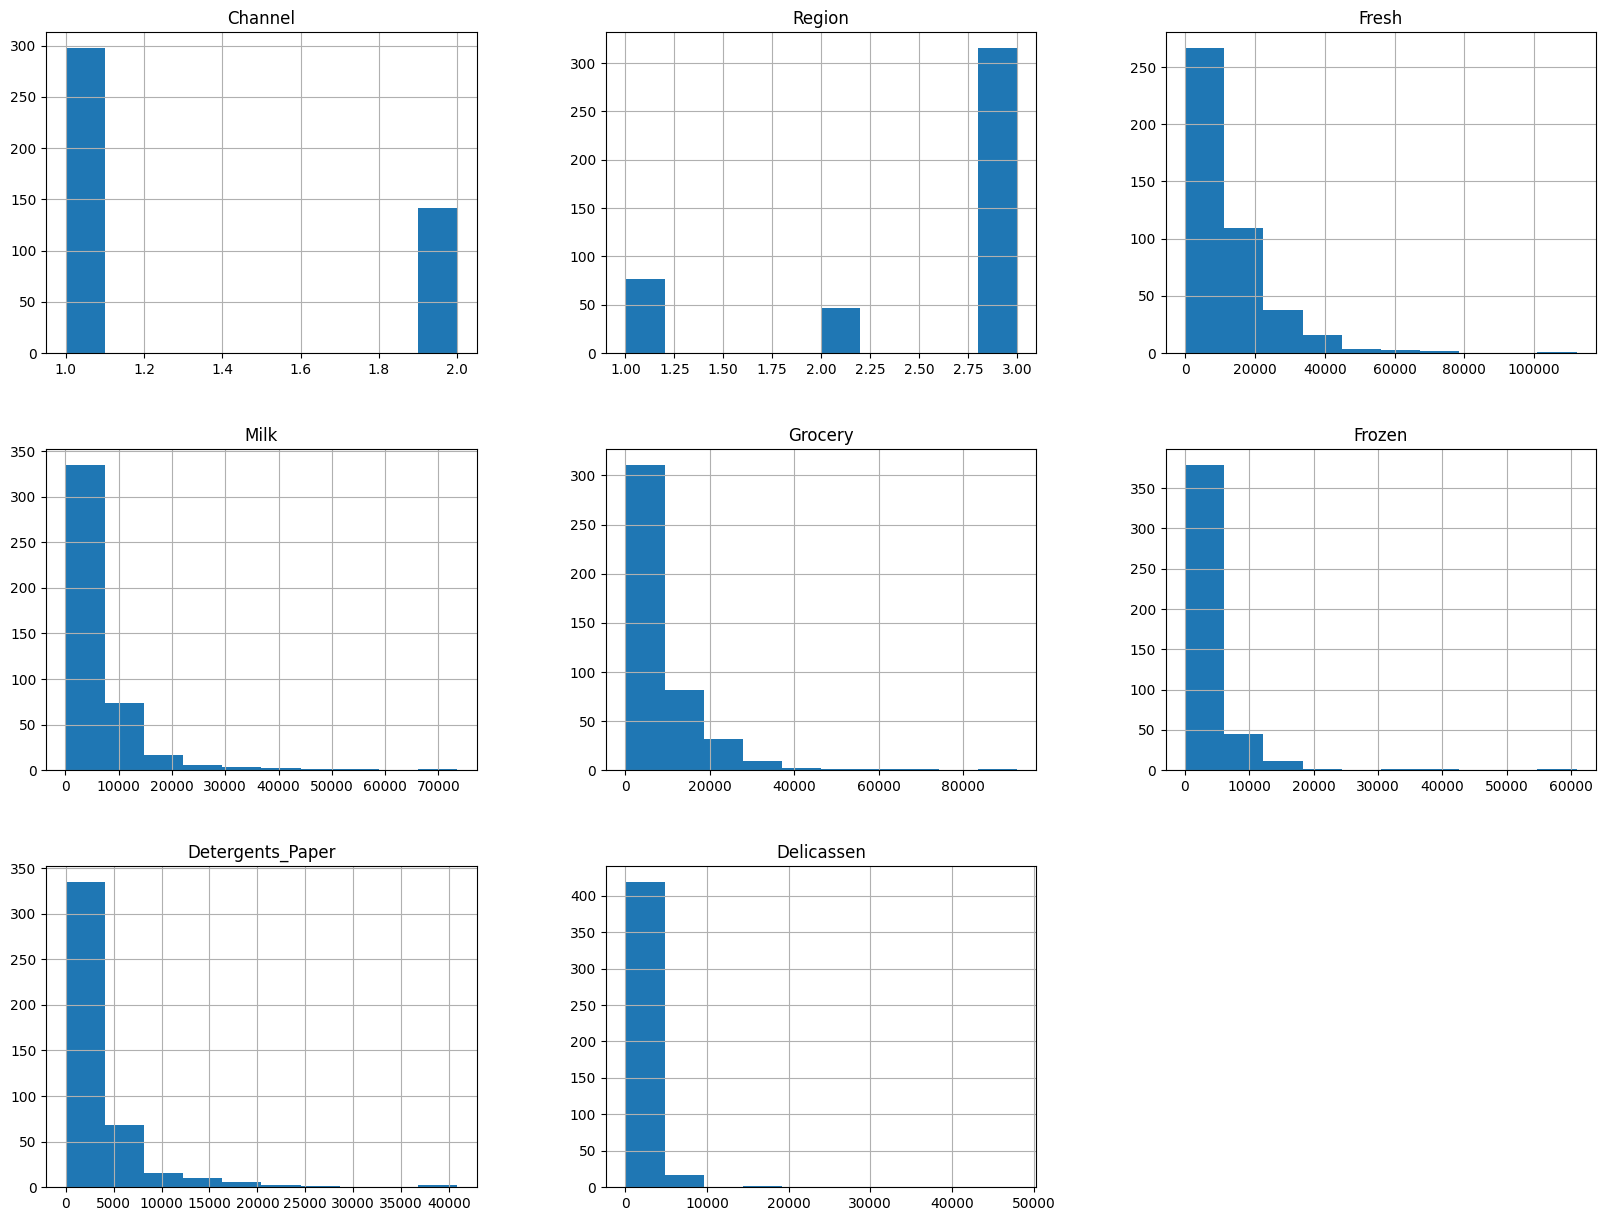

In [138]:
# used for frequency distribution in an interval
# also helps to know if the data is normally distributed or data has skewness.

freq_graph = data.select_dtypes(include = ["int"])
freq_graph.hist(figsize = (20, 15))

### OUTLIER DETECTION

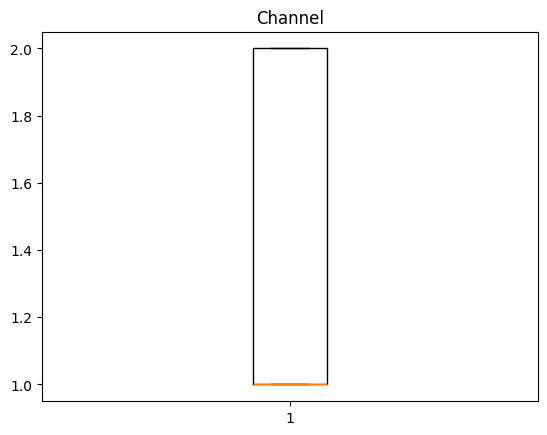

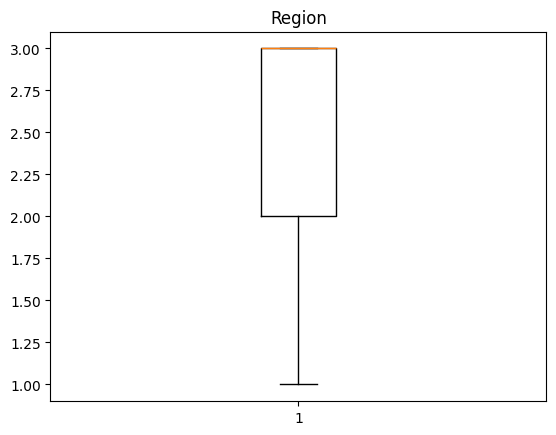

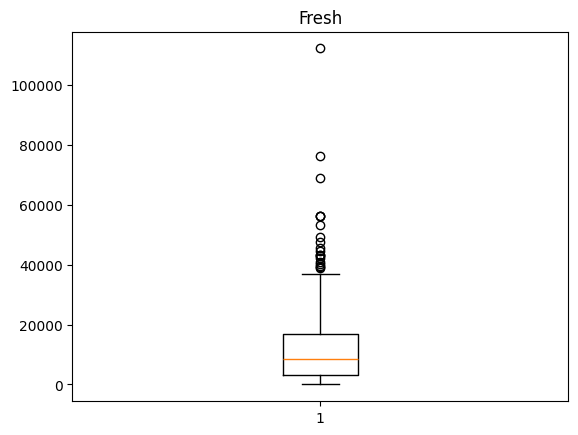

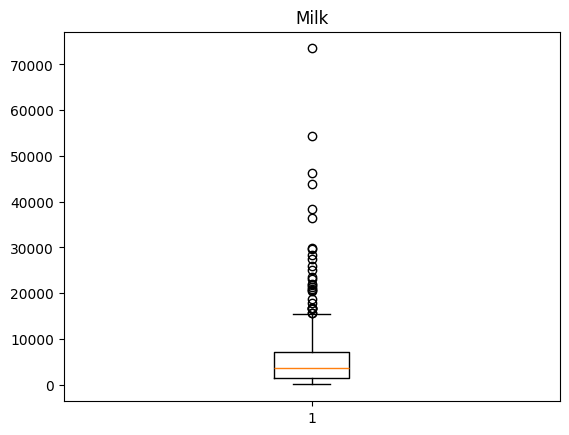

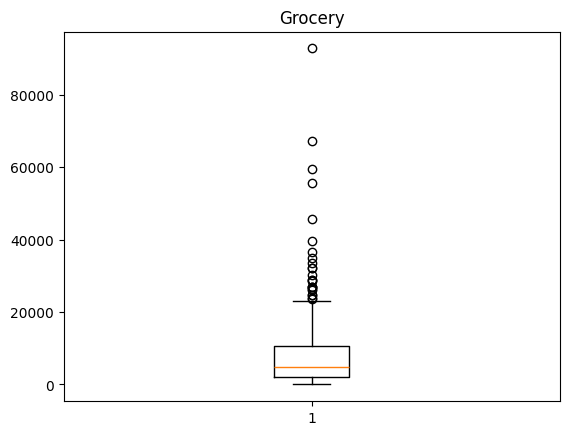

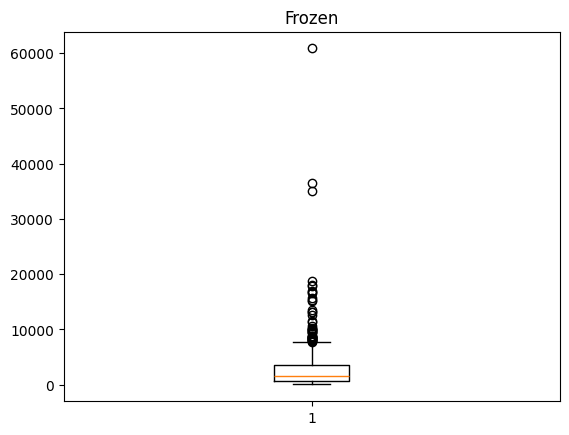

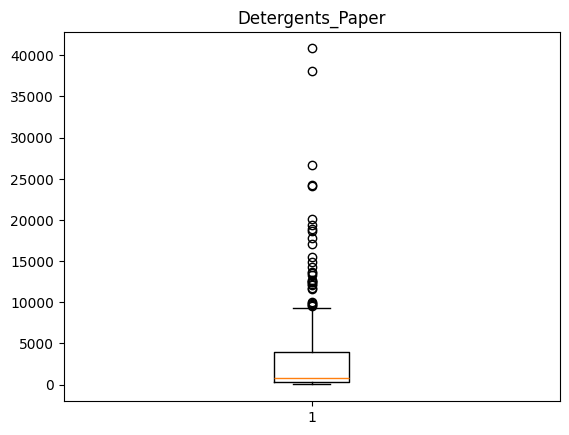

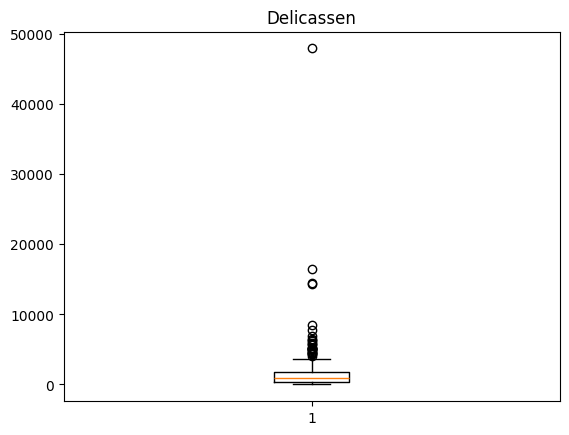

In [139]:
# Unsupervised learning classify objects based on the patterns in the dataset.
# If there exist oulier in the data it can higly imapct the classification process of data.
# It may also misclasify data leading to reduced accuracy and error can occur.
# Unlike supervised learning, if any error occurs there won't be any teacher to tell that it has classified wrong.

for i in data.columns:
    plt.boxplot(data[i])
    plt.title(i)
    plt.show()

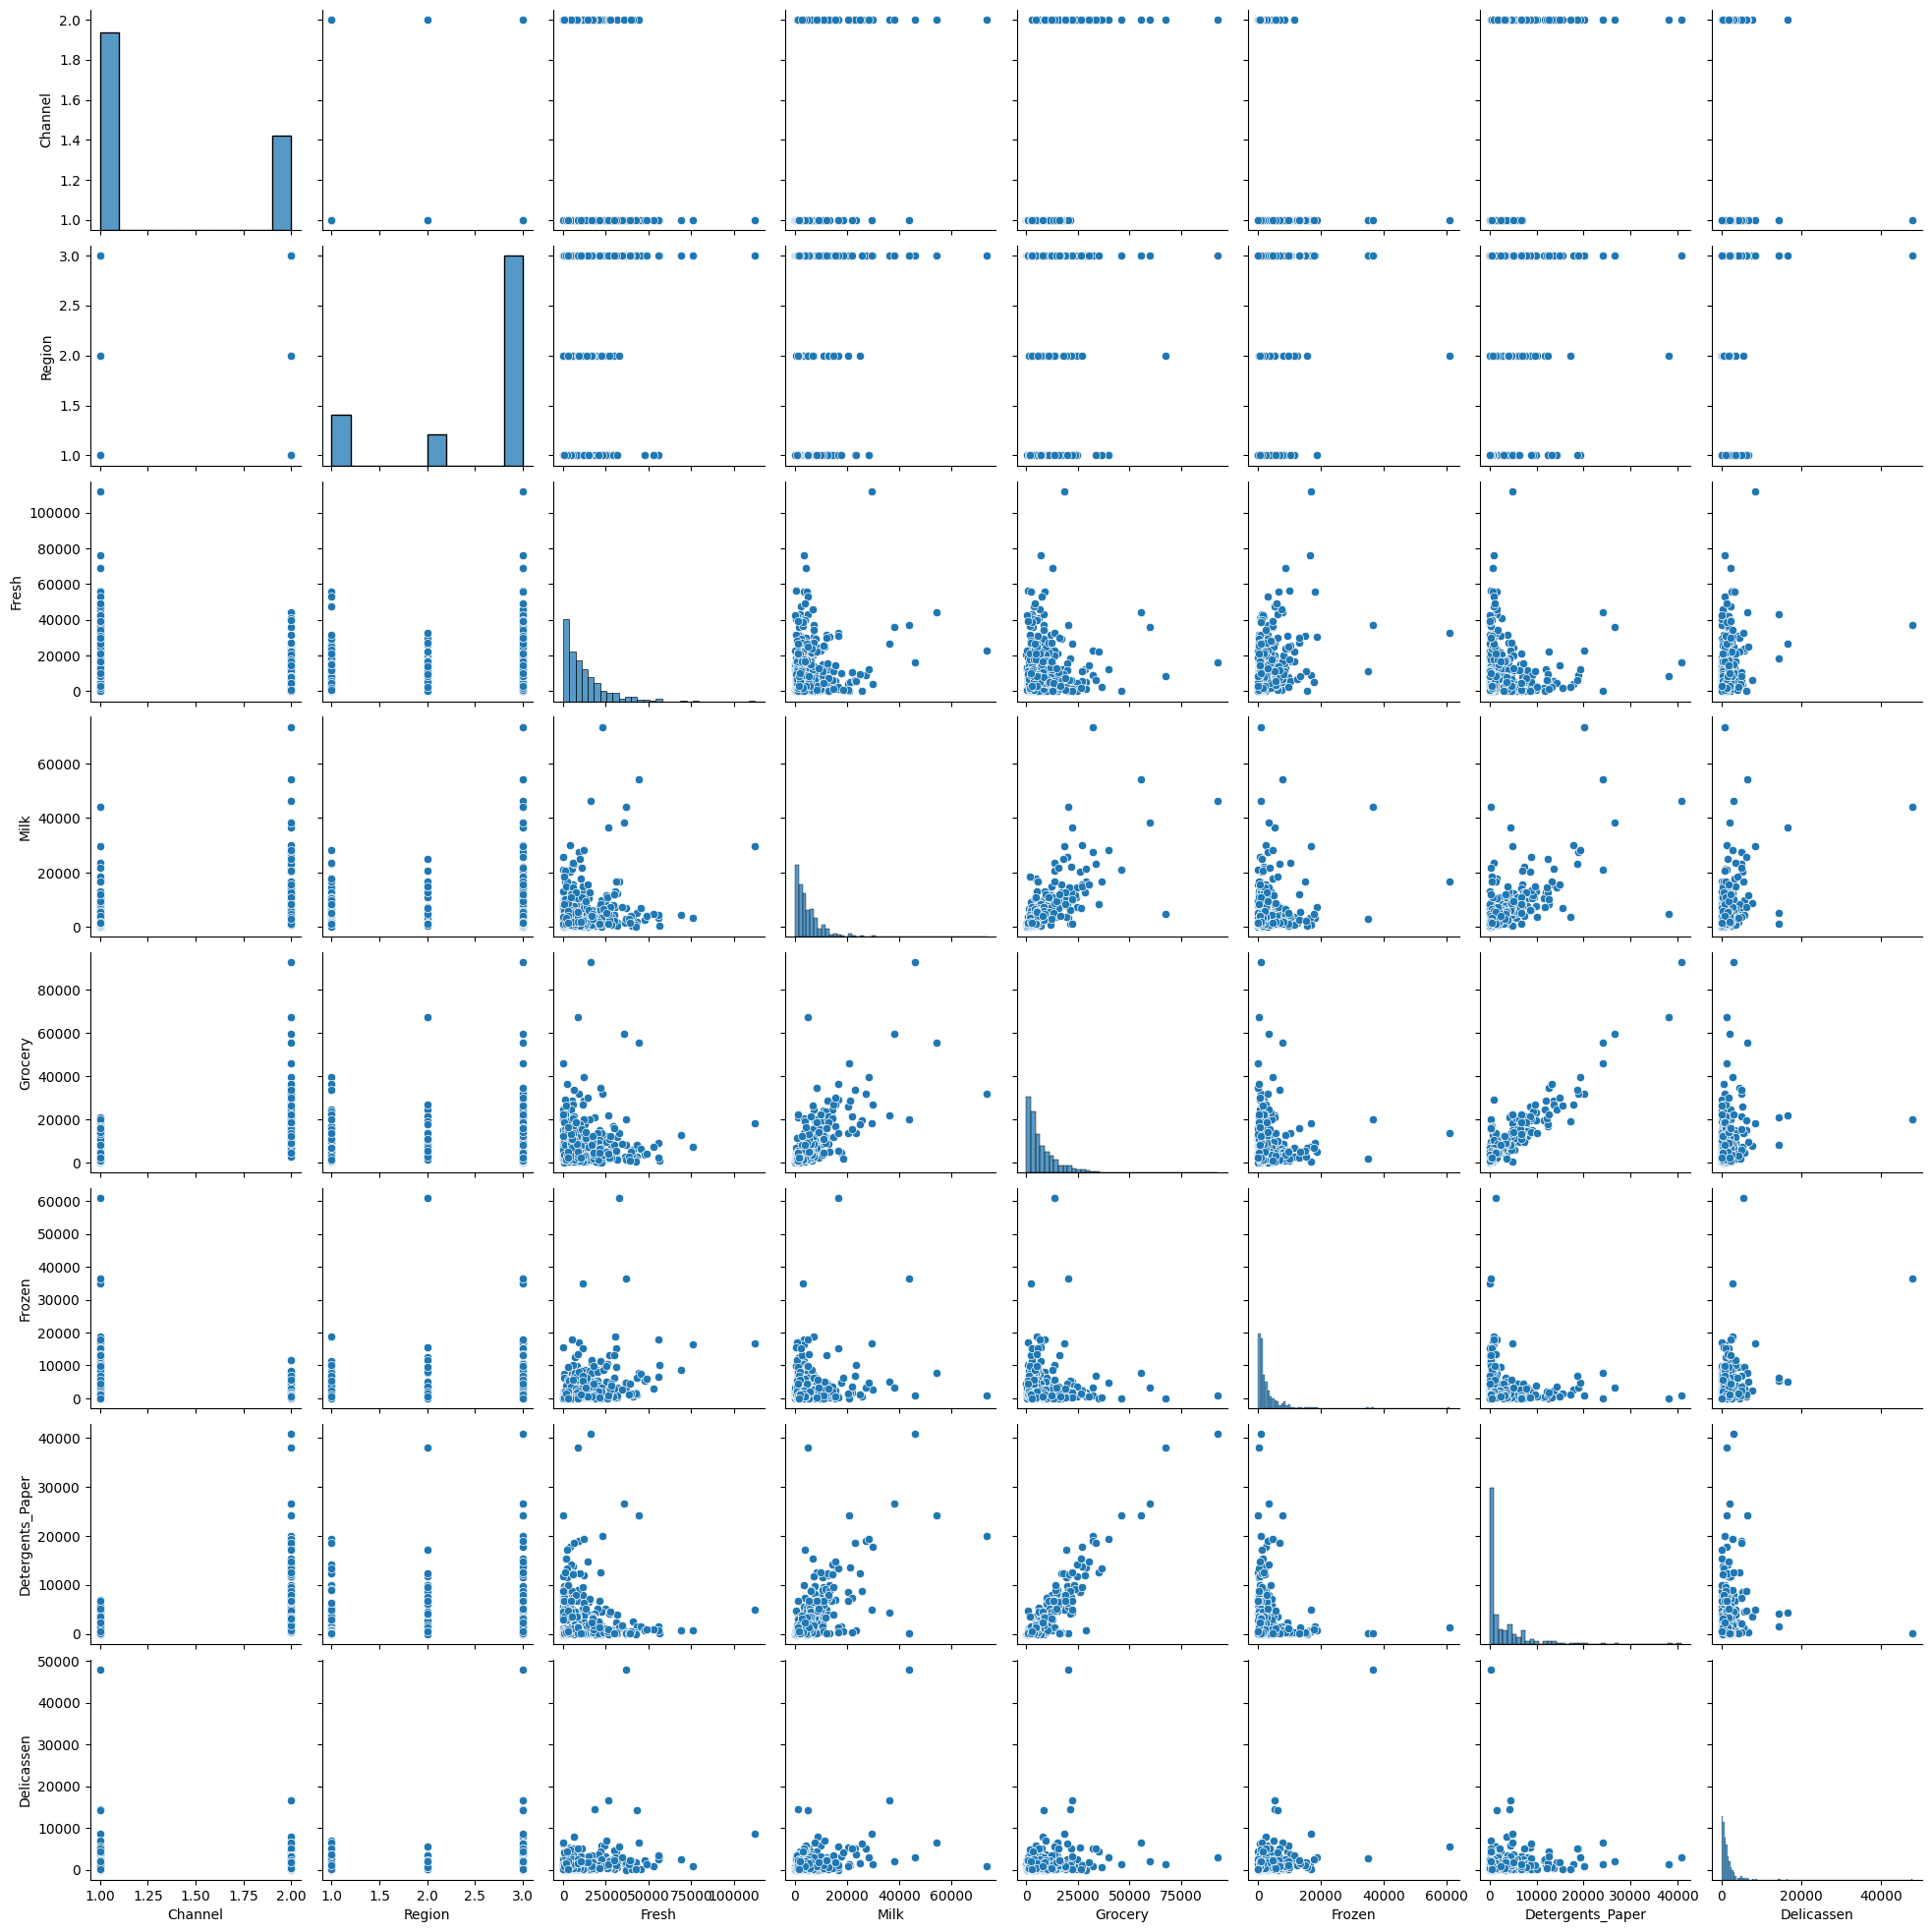

In [140]:
# Pairplot helps to visualize the dataset.
# This helps to give brief idea of outliers quickly kf exists through plotting.

sns.pairplot(data)

###### From the pairplot, we could see that there exists outliers in many columns which should be removed.
###### To remove outliers, the most common methods we use are Z-Score and Inter Quartile Range method.
###### Before removal, let us look into the distribution of features, so that we could decide which method should be applied for this data to remove outliers.

Channel  0.760951157493207
Region  -1.283626930042069
Fresh  2.561322751927935
Milk  4.053754849210881
Grocery  3.5874286903915453
Frozen  5.9079856924559575
Detergents_Paper  3.6318506306913645
Delicassen  11.151586478906117


<ipython-input-141-411b37590680>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


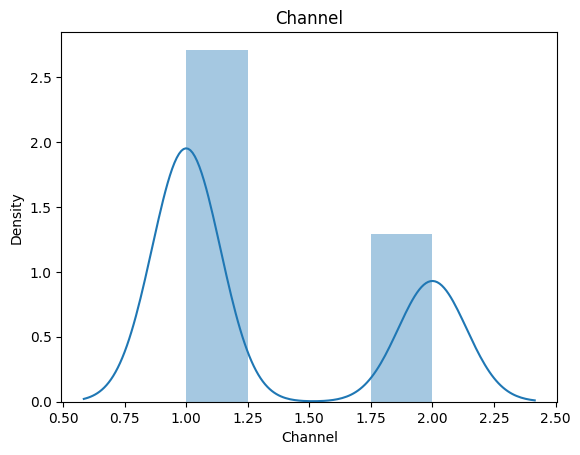

<ipython-input-141-411b37590680>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


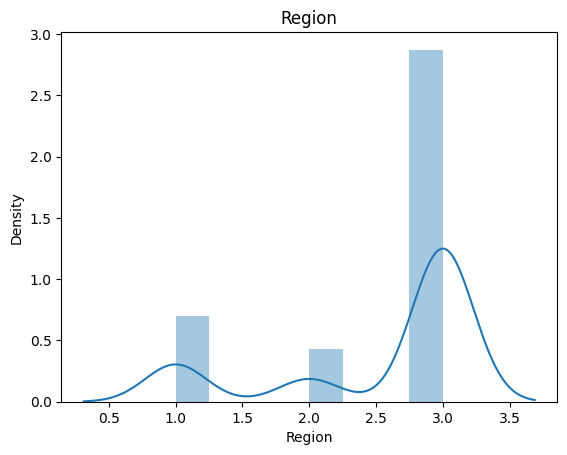

<ipython-input-141-411b37590680>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


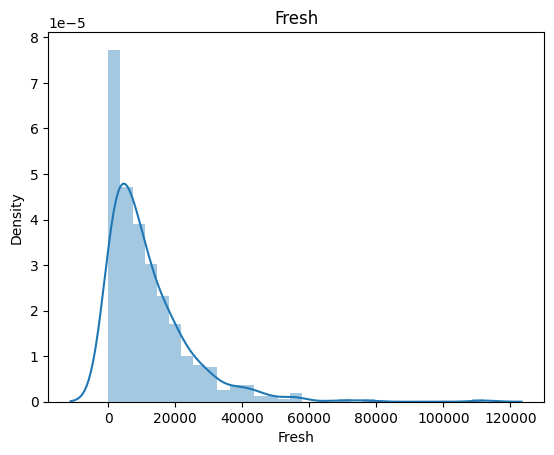

<ipython-input-141-411b37590680>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


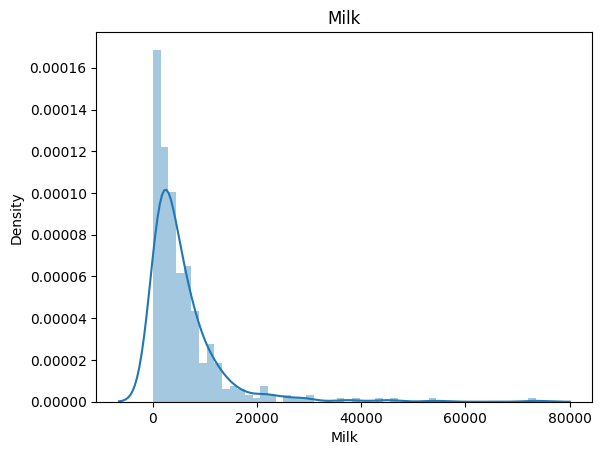

<ipython-input-141-411b37590680>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


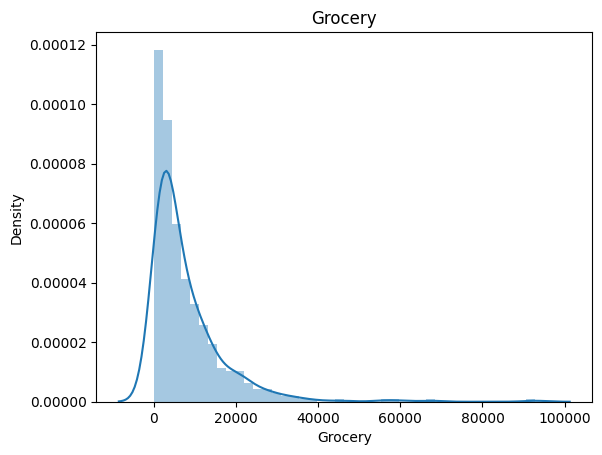

<ipython-input-141-411b37590680>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


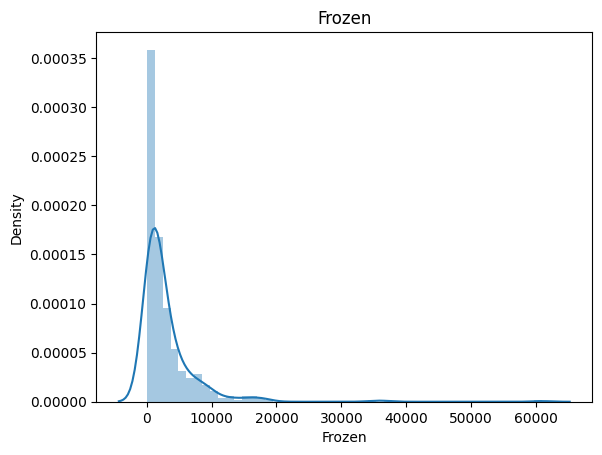

<ipython-input-141-411b37590680>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


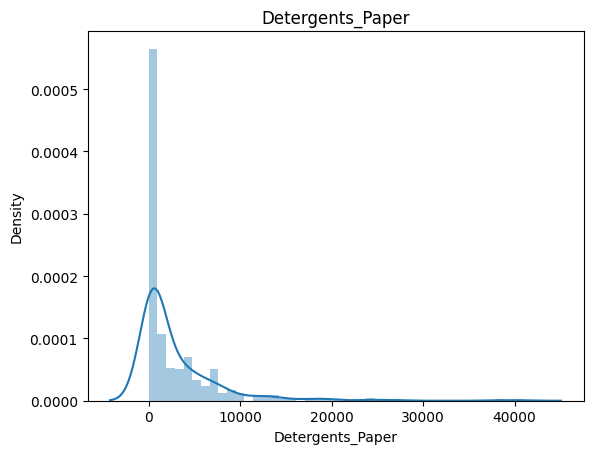

<ipython-input-141-411b37590680>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


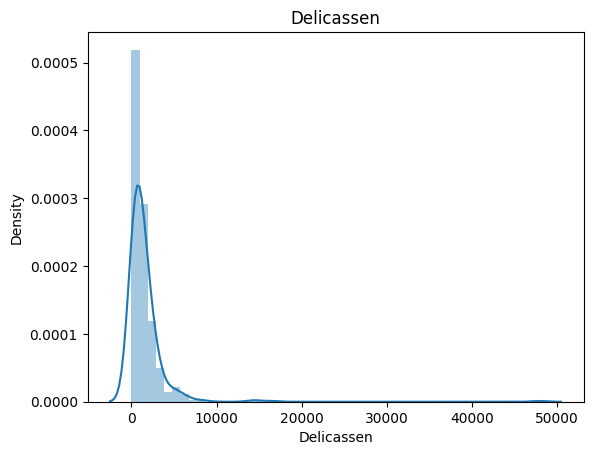

In [141]:
# First lets check the skewness of data



for i in data.columns:
    skew_data = data[i].skew()
    print(i, "", skew_data)


# Plotting the graph for features with skewness

for i in data.columns:
    sns.distplot(data[i])
    plt.title(i)
    plt.show()

###### "Channel" feature has a normal distribution.
###### "Region","Fresh" features are moderately skewed.
###### All other features are highly skewed.

###### Most of the features are skewed we cannot use Z-score method as it is used for normal distributions. So IQR method is used here which can be applied for skewed as well as normally distributed data.


In [142]:
for i in data.columns:

    # Inter Quartile Range

    Q1 = np.percentile(data[i], 25,interpolation="midpoint")
    Q2 = np.percentile(data[i], 50,interpolation="midpoint")
    Q3 = np.percentile(data[i], 75,interpolation="midpoint")
    print("Interquartile range: {} \n".format(i))
    print("Q1: {}".format(Q1))
    print("Q2: {}".format(Q2))
    print("Q3: {}\n".format(Q3))

    IQR = Q3-Q1
    print("IQR:{}\n".format(IQR))

    # Limit identification

    low_limit = Q1-1.5*IQR
    up_limit  = Q3+1.5*IQR
    print("Lower limit : {}".format(low_limit))
    print("Upper limit : {}\n".format(up_limit))


    # Finding outlier

    outlier= []
    for x in data[i]:
        if ((x>up_limit) or (x<low_limit)):
            outlier.append(x)
    print("Outlier: {}\n".format(outlier))


    # Finding index colum with outlier

    #uperlimit outlier

    ind_up      = data[i]>up_limit
    ind_updata  = data.loc[ind_up].index
    print("Indexes greater than upperlimit: {}\n".format(ind_updata))


    # lower limit outlier

    ind_low     = data[i]<low_limit
    ind_lowdata = data.loc[ind_low].index
    print("Indexes less than lowerlimit: {}\n".format(ind_lowdata))
    print("\n\n")

Interquartile range: Channel 

Q1: 1.0
Q2: 1.0
Q3: 2.0

IQR:1.0

Lower limit : -0.5
Upper limit : 3.5

Outlier: []

Indexes greater than upperlimit: Index([], dtype='int64')

Indexes less than lowerlimit: Index([], dtype='int64')




Interquartile range: Region 

Q1: 2.0
Q2: 3.0
Q3: 3.0

IQR:1.0

Lower limit : 0.5
Upper limit : 4.5

Outlier: []

Indexes greater than upperlimit: Index([], dtype='int64')

Indexes less than lowerlimit: Index([], dtype='int64')




Interquartile range: Fresh 

Q1: 3119.5
Q2: 8504.0
Q3: 16934.5

IQR:13815.0

Lower limit : -17603.0
Upper limit : 37657.0

Outlier: [43088, 56159, 44466, 40721, 43265, 56082, 76237, 42312, 45640, 112151, 47493, 56083, 53205, 49063, 68951, 40254, 42786, 39679, 38793, 39228]

Indexes greater than upperlimit: Index([ 29,  39,  47,  52,  87, 103, 125, 129, 176, 181, 239, 258, 259, 282,
       284, 285, 289, 370, 377, 436],
      dtype='int64')

Indexes less than lowerlimit: Index([], dtype='int64')




Interquartile range: Milk 

Q1

###### Milk, fresh, grocery, frozen detergent paper, delicassen has outliers in it.
###### But after obatining the outlier indices we could see about 1/4th of data will be removed as outliers which can affect the accuracy too.

###### So we will not remove the outlier from the data.

### DATA PREPROCESSING

In [143]:
# Check if there exist null values

data.isnull().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


###SCALING THE DATASET

In [144]:
## To avoid the disproportionality in data we use Standard Scaling here.

from sklearn.preprocessing import StandardScaler

stdclr = StandardScaler()
data1  = stdclr.fit_transform(data)

In [145]:
# Converting data into dataframe
# This helps difficult data manupulations making it easier to analyze.

data1 = pd.DataFrame(data1, columns=data.columns)
data1.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


### UNSUPERVISED LEARNING - CLUSTERING MODELS

### 1) k means Clustering

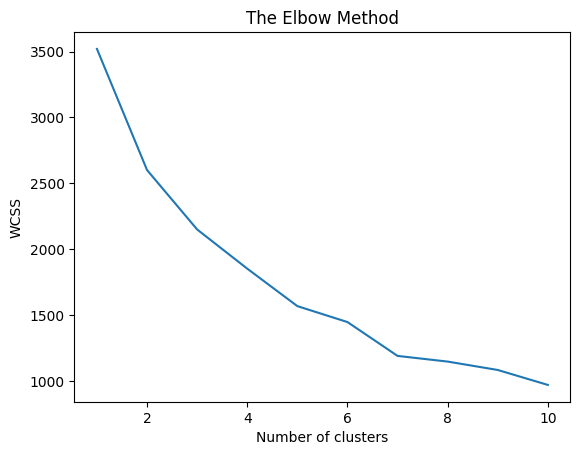

In [146]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = "k-means++", random_state = 42)
    kmeans.fit(data1)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [147]:
# The elbow bends at value 5 as observed from image so the same can be taken as the no. of clusters

kmeans = KMeans(n_clusters = 5, init = "k-means++", random_state = 42)
y_means = kmeans.fit_predict(data1)
y_means

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 4, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 4, 1, 1, 0, 0,
       0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 1, 1, 2, 0, 1, 1, 0, 2, 0, 0, 1, 2,
       1, 0, 1, 1, 1, 4, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 2, 2, 4,
       1, 1, 1, 1, 2, 4, 0, 1, 0, 1, 1, 1, 0, 0, 0, 4, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 4, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 4, 0,
       3, 3, 0, 0, 3, 3, 3, 0, 3, 3, 3, 0, 3, 2, 3, 3, 0, 3, 0, 3, 0, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       0, 3, 0, 3, 0, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 4, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 3, 0, 3, 0, 0, 3, 0,

In [148]:
#Silhoutte score is similar to accuracy which indicates the proper cluster formation.
# Higher silhoutte score indicates the best classification.

sil_avg = silhouette_score(data1, y_means)
sil_avg

0.35696445697910095

###2) Agglomerative Clustering

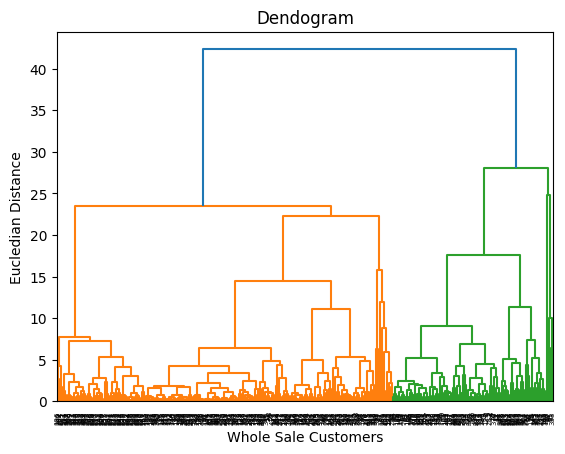

In [149]:
import scipy.cluster.hierarchy as sch

dendogram = sch.dendrogram(sch.linkage(data1, method = "ward"))
plt.title("Dendogram")
plt.xlabel("Whole Sale Customers")
plt.ylabel("Eucledian Distance")
plt.show()

In [150]:
# Forms clusters based on similarities

from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 3, metric = "euclidean", linkage ="ward")
y_hc = hc.fit_predict(data1)
y_hc

array([2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 0, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 0, 2, 2, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 0, 0, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2,

In [151]:
#Silhoutte score

sil_avg = silhouette_score(data1, y_hc)
sil_avg

0.3600234023958461

### 3)Density Based Spatial Clustering of Application with Noise(DBSCAN)

In [152]:
from sklearn.neighbors import NearestNeighbors

# n_neighbors can be taken in a range from 8 to 16
nbrs = NearestNeighbors(n_neighbors = 8).fit(data1)

# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(data1)

# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row

sort_neigh_dist = np.sort(neigh_dist, axis=0)

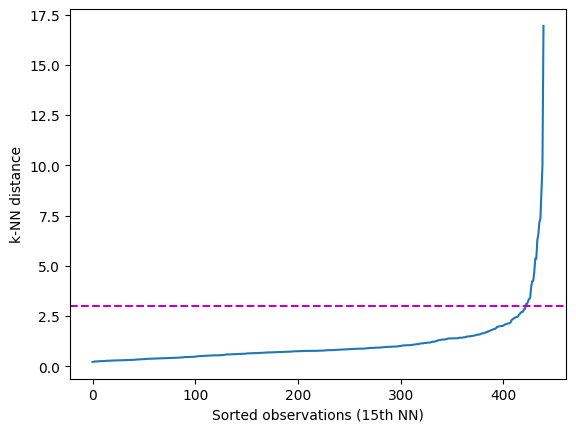

In [154]:
k_dist = sort_neigh_dist[:, 7]
plt.plot(k_dist)
plt.axhline(y = 3, linewidth=1.5, linestyle='dashed', color='m')
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (15th NN)")
plt.show()

From this, the knee point come at value 3 so it can be taken as the epsilon value and the min point is the identified by multifying the number of features of data by 2. So minimum points for this dataset is 16

In [155]:
from sklearn.cluster import DBSCAN

clusters = DBSCAN(eps = 3, min_samples = 16).fit(data1)
clusters.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [156]:
from collections import Counter

Counter(clusters.labels_)

Counter({0: 428, -1: 12})

###### We got one cluster with 428 datapoints and a noise cluster -1 with 12 datapoints

In [157]:
#Silhoutte score

sil_avg = silhouette_score(data1, clusters.labels_)
sil_avg

0.6866475343140435

Based on the silhoutte scores obtained for different clustering models using scaled data:

k means - 35.7%


Agglomerative clustering - 36%


DbSCAN - 68.6%


As the data is scaled, the accuracy based on silhoutte score is also scaled.

**From the above analysis, DBSCAN can be considered as the good model to predict this dataset to an extent.**

### PRINCIPAL COMPONENT ANALYSIS

In [158]:
data.mean() # calculating mean of data

,0
Channel,1.322727
Region,2.543182
Fresh,12000.297727
Milk,5796.265909
Grocery,7951.277273
Frozen,3071.931818
Detergents_Paper,2881.493182
Delicassen,1524.870455


In [159]:
data.var() # calculating variance of data

,0
Channel,2.190723e-01
Region,5.994978e-01
Fresh,1.599549e+08
Milk,5.446997e+07
Grocery,9.031010e+07
Frozen,2.356785e+07
Detergents_Paper,2.273244e+07
Delicassen,7.952997e+06


In [160]:
data.corr() # correlation of data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


In [161]:
## Simply scaling the dataset
from sklearn.preprocessing import scale

scaled_data = scale(data)
scaled_data

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

In [162]:
## Converting into dataframe

df = pd.DataFrame(scaled_data, columns = data.columns)
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [163]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 4) # reducing to 4 components
pca_data = pca.fit_transform(df)
pca_data

array([[ 0.84393893, -0.51535075,  0.76763222,  0.0442148 ],
       [ 1.06267645, -0.48460126,  0.67297526, -0.40137178],
       [ 1.26914052,  0.68205455,  0.6640946 , -1.63495276],
       ...,
       [ 3.86514909, -0.47985376,  0.52534452,  0.68713197],
       [-1.09706738, -0.06989568,  0.63012755, -0.31182088],
       [-1.16595067, -0.90215675,  0.59770486, -0.34265555]])

In [164]:
pca_data.shape # dimensions reduced to 4 from 8

(440, 4)

In [165]:
pca_data = pd.DataFrame(pca_data, columns = ["PC1", "PC2", "PC3", "PC4"])## as we have 4 components
pca_data.head()

,PC1,PC2,PC3,PC4
0,0.843939,-0.515351,0.767632,0.044215
1,1.062676,-0.484601,0.672975,-0.401372
2,1.269141,0.682055,0.664095,-1.634953
3,-1.056782,0.610821,0.505654,-0.196005
4,0.634030,0.974199,0.771209,-0.186374


In [166]:
## Finding out the correlation of data with reduced dimensions

pca_data.corr().round()

,PC1,PC2,PC3,PC4
PC1,1.0,0.0,-0.0,-0.0
PC2,0.0,1.0,0.0,-0.0
PC3,-0.0,0.0,1.0,-0.0
PC4,-0.0,-0.0,-0.0,1.0


In [167]:
#Represents the variance of the data explained by each of the principal components in your data

pca.explained_variance_ratio_*100

array([38.75012291, 22.37458795, 12.64717345,  9.22990372])

###### 38% of variance explained by PCA1, 22% by PCA2, 12% by PCA3, 9% by PCA4

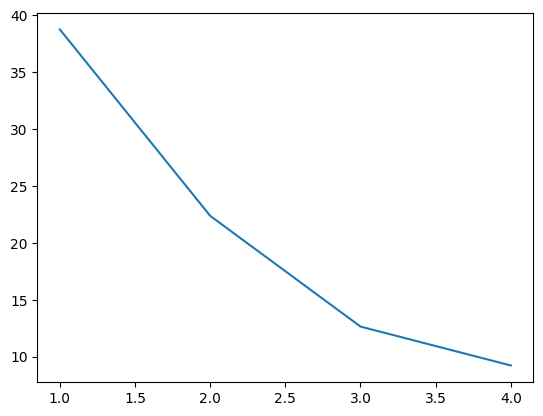

In [168]:
## Plotting the explained variance ratio
plt.plot([1,2,3,4],pca.explained_variance_ratio_*100)
plt.show()

In [169]:
38.75012291+22.37458795+12.64717345+9.22990372

83.00178803

###### By using 4 principal components we got 83% that is the dimension of data has been reduced.